In [1]:
%matplotlib inline

import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder
import pickle


In [2]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []

In [3]:
print(parser.samples)

{'Nonhomologous end-joining': ['XRCC6', 'XRCC5', 'PRKDC', 'LIG4', 'XRCC4', 'DCLRE1C', 'NHEJ1'], 'Microhomology end-joining': ['MRE11', 'RAD50', 'NBN', 'RBBP8', 'ERCC4', 'ERCC1', 'LIG1', 'POLL', 'POLB', 'PARP1', 'LIG3', 'XRCC1'], 'Homologous recombination': ['RAD51', 'RAD51B', 'RAD51D', 'DMC1', 'XRCC2', 'XRCC3', 'RAD52', 'RAD54L', 'RAD54B', 'BRCA1', 'SHFM1', 'RAD50', 'MRE11', 'NBN', 'RBBP8', 'MUS81', 'EME1', 'EME2', 'GIYD1', 'GIYD2', 'GEN1'], 'Base excision repair': ['UNG', 'SMUG1', 'MBD4', 'TDG', 'OGG1', 'MUTYH', 'NTHL1', 'MPG', 'NEIL1', 'NEIL2', 'NEIL3', 'APEX1', 'APEX2', 'LIG3', 'XRCC1', 'PNKP', 'APLF', 'PARP1', 'PARP2', 'PARP3', 'MGMT', 'ALKBH2', 'ALKBH3'], 'Repair of DNA-topoisomerase crosslinks': ['TDP1', 'TDP2'], 'Mismatch excision repair': ['MSH2', 'MSH3', 'MSH6', 'MLH1', 'PMS2', 'MSH4', 'MSH5', 'MLH3', 'PMS1', 'PMS2L3'], 'Nucleotide excision repair': ['RAD23B', 'CETN2', 'RAD23A', 'XPA', 'DDB1', 'DDB2', 'RPA1', 'RPA2', 'RPA3', 'TFIIH', 'ERCC3', 'ERCC2', 'GTF2H1', 'GTF2H2', 'GTF2

In [4]:
inputs = set()
samples = parser.samples
for category in samples:
    for gene in samples[category]:
        inputs.add(gene)
print(inputs)

{'TDP1', 'POLE', 'TREX2', 'MSH2', 'RBBP8', 'DDB1', 'FANCF', 'CHEK2', 'UBE2V2', 'RPA1', 'RAD50', 'FANCE', 'TDG', 'PER1', 'RAD1', 'XRCC1', 'ERCC2', 'RRM2B', 'POLD1', 'HLTF', 'PARP1', 'APLF', 'MAD2L2', 'POLQ', 'CLK2', 'RAD23A', 'LIG4', 'ERCC4', 'BRCA1', 'GTF2H5', 'CHEK1', 'GEN1', 'ALKBH2', 'PMS2', 'BRIP1', 'ERCC8', 'XRCC4', 'UNG', 'RAD54B', 'FANCB', 'TREX1', 'FANCM', 'MDC1', 'FANCC', 'FAAP24', 'MGMT', 'MSH4', 'RAD18', 'FEN1', 'POLM', 'RPA3', 'RAD51B', 'OGG1', 'ATR', 'SHFM1', 'ERCC5', 'SHPRH', 'PRKDC', 'NHEJ1', 'RAD51C', 'DCLRE1C', 'PARP3', 'POLI', 'XRCC5', 'FANCA', 'ERCC1', 'MPG', 'MRE11', 'REV1L', 'PNKP', 'BTBD12', 'FANCI', 'FANCG', 'RIF1', 'MNAT1', 'BRCA2', 'TOPBP1', 'HUS1', 'DMC1', 'RAD51', 'CDK7', 'TP53', 'GTF2H3', 'NTHL1', 'ERCC6', 'MSH6', 'H2AFX', 'POLB', 'PMS1', 'EXO1', 'LIG1', 'MMS19', 'XRCC6', 'DUT', 'RNF4', 'UBE2B', 'NBN', 'RAD23B', 'CCNH', 'RAD54L', 'GIYD1', 'RNF168', 'NUDT1', 'PMS2L3', 'FAN1', 'XRCC3', 'RNF8', 'XAB2', 'RAD51D', 'APTX', 'MLH1', 'FAAP20', 'SETMAR', 'RPA2', 'REV3

In [5]:
pValues = []
for gene in inputs:
    print(gene)
    all_donors = df['donor_unique_id'].unique()
    donorsInGene = parser.getDonors(gene)
    diffDonors = parser.diff(all_donors, donorsInGene)

    affected = []
    notaffected = []

    for donor in donorsInGene:
        donorDF = df[(df['donor_unique_id'] == donor)]
        affected.append(len(donorDF.index))

    for donor in diffDonors:
        donorDF = df[(df['donor_unique_id'] == donor)]
        notaffected.append(len(donorDF.index))
    if(len(affected) == 0):
        affected.append(0)
    if(len(notaffected) == 0):
        notaffected.append(0)
    data.append(notaffected)
    data.append(affected)
    labels.append("WT " + gene)
    labels.append("MUT " + gene)
    value = stats.ttest_ind(affected, notaffected)[1]
    pValues.append(value)
    print(value)

TDP1
0.0005195028837750801
POLE
6.345111772667445e-09
TREX2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/TREX2?content-type=application/json;expand=1
symb got fricked


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
MSH2
6.101528754718389e-21
RBBP8
0.00010630509553453367
DDB1
0.25265642986297404
FANCF
nan
CHEK2
0.17370842405287698
UBE2V2
0.4715591615067086
RPA1
1.9943220099486137e-08
RAD50
0.004071881239984347
FANCE
0.09836791172071749
TDG
8.185378496501703e-15
PER1
0.41948011203981717
RAD1
0.5354893843015642
XRCC1
0.010336661231414466
ERCC2
0.12230264724107563
RRM2B
0.15258139943110818
POLD1
1.0509060424015153e-21
HLTF
0.0010088109205907889
PARP1
6.127376244576102e-14
APLF
3.6915751987558677e-10
MAD2L2
0.5198309595705277
POLQ
0.3856994080337962
CLK2
0.7548125835160282
RAD23A
0.9667185428758394
LIG4
nan
ERCC4
nan
BRCA1
1.2027544362577605e-10
GTF2H5
nan
CHEK1
nan
GEN1
0.0005091088304816632
ALKBH2
nan
PMS2
nan
BRIP1
5.075882791806269e-17
ERCC8
0.003567687788302094
XRCC4
2.946833567904031e-13
UNG
0.0002870462650760585
RAD54B
2.471269514322044e-06
FANCB
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/FANCB?content-type=application/json;expand=1
symb 

In [7]:
parser.save_obj(pValues,'pvalues')
parser.save_obj(data, 'data')

In [8]:
print(len(pValues)*2 - len(data))

0


[0.6666666666666666, 1.3333333333333333, 2.6666666666666665, 3.3333333333333335, 4.666666666666667, 5.333333333333333, 6.666666666666667, 7.333333333333333, 8.666666666666666, 9.333333333333334]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

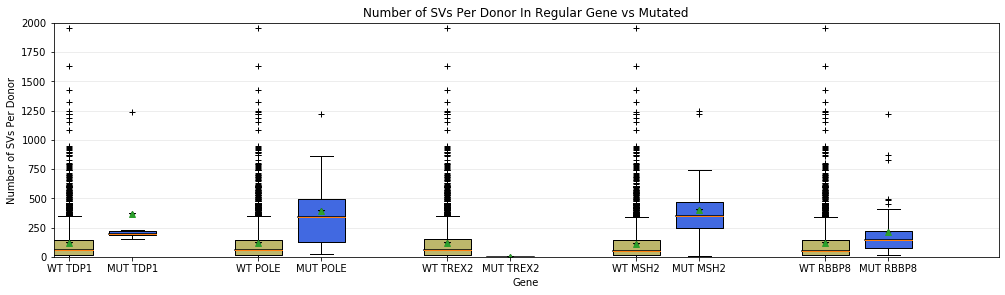

In [49]:
position = []
counter = 1
data = parser.load_obj('data')
for i in range (len(data[0:11]) + 3):
    if counter % 3 == 0:
        counter +=1
        continue
    position.append(counter/1.5)
    counter+=1
print(position)
fig, ax1 = plt.subplots(figsize=(15, 5))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data[0:10], notch=0, sym='+', vert=1, whis=1.5, showmeans=True, widths = 0.5, positions=position)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title(
    'Number of SVs Per Donor In Regular Gene vs Mutated')
ax1.set_xlabel('Gene')
ax1.set_ylabel('Number of SVs Per Donor')

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data[0:10])
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 2000
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticks(position)
ax1.set_xticklabels(labels[0:21])

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(position, ax1.get_xticklabels()):
    k = tick % 2
    print(pos[tick])
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'Regular Gene',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Mutated Gene',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')